# **Decision Trees**

---

En esta clase aprenderemos sobre uno de los algoritmos mas fundamentales y versatiles en machine learning: los arboles de decision. 
Vamos con un poco de teoria  

### 1. Introduccion: Que es un Arbol de Decision?

Un **arbol de decision** es un modelo de machine learning que toma decisiones mediante una serie de preguntas organizadas en forma de arbol. Es similar a como tomariamos decisiones en la vida real.

### Ejemplo cotidiano:

Imagina que quieres decidir si salir a correr:
- **Pregunta 1:** ¿Esta lloviendo?
  - Si → No salgo
  - No → Siguiente pregunta
- **Pregunta 2:** ¿Tengo tiempo libre?
  - Si → Salgo a correr
  - No → No salgo

Este proceso de preguntas secuenciales es exactamente como funciona un arbol de decision.

--

### 2. Componentes de un Arbol de Decision

### Elementos principales:

1. **Nodo raiz (Root Node):** El primer nodo del arbol, donde comienza la decision
2. **Nodos internos (Internal Nodes):** Representan preguntas o condiciones sobre los atributos
3. **Ramas (Branches):** Conectan los nodos y representan el resultado de una decision
4. **Nodos hoja (Leaf Nodes):** Los nodos finales que contienen la prediccion o decision final

### Terminologia importante:

- **Split (Division):** El proceso de dividir un nodo en sub-nodos
- **Profundidad (Depth):** La longitud del camino mas largo desde la raiz hasta una hoja
- **Pureza (Purity):** Que tan homogeneos son los datos en un nodo

--  


### 3. Tipos de Arboles de Decision

### 3.1 Arboles de Clasificacion

Se utilizan cuando la variable objetivo es **categorica** (discreta).

**Ejemplos:**
- Predecir si un correo es spam o no spam
- Clasificar especies de flores
- Determinar si un cliente comprara un producto (si/no)

### 3.2 Arboles de Regresion

Se utilizan cuando la variable objetivo es **continua** (numerica).

**Ejemplos:**
- Predecir el precio de una casa
- Estimar la temperatura de manana
- Calcular el salario de un empleado

--  

### 4. Como Funciona: El Proceso de Division

El algoritmo construye el arbol mediante divisiones sucesivas de los datos. Pero, ¿como decide donde dividir?

### 4.1 Criterios para Arboles de Clasificacion

#### Indice de Gini

Mide la "impureza" de un nodo. Un nodo es puro si todos los ejemplos pertenecen a la misma clase.

**Formula:**
```
Gini = 1 - Σ(p_i)²
```

Donde `p_i` es la probabilidad de cada clase.

- **Gini = 0:** Nodo completamente puro (perfecta clasificacion)
- **Gini = 0.5:** Maxima impureza (clases equilibradas)

#### Entropia (Ganancia de Informacion)

Mide el desorden o incertidumbre en los datos.

**Formula:**
```
Entropia = -Σ(p_i * log₂(p_i))
```

- **Entropia = 0:** Nodo puro
- **Entropia alta:** Mucha incertidumbre

### 4.2 Criterio para Arboles de Regresion

#### Error Cuadratico Medio (MSE)

Para problemas de regresion, se busca minimizar la varianza de los valores en cada nodo.

**Formula:**
```
MSE = (1/n) * Σ(y_i - ȳ)²
```

Donde:
- `y_i` son los valores reales
- `ȳ` es la media de los valores en el nodo
- `n` es el numero de observaciones

---

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Importamos las librerías necesarias para el análisis
import numpy as np
import os
import sklearn

# Configuramos una semilla aleatoria para reproducibilidad de resultados
np.random.seed(42)

# Configuramos matplotlib para mostrar gráficos en el notebook
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Configuramos el tamaño de las etiquetas en los gráficos
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Definimos las rutas donde guardar las figuras generadas
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# Creamos el directorio si no existe
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Función para guardar figuras con formato y resolución específica
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and visualizing

In [ ]:
# Importamos las librerías necesarias para trabajar con árboles de decisión
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Cargamos el dataset de flores Iris
iris = load_iris()
# Seleccionamos solo las columnas de longitud y anchura del pétalo (columnas 2 y 3)
X = iris.data[:, 2:] # petal length and width
# Variable objetivo: tipo de flor
y = iris.target

# Creamos un clasificador de árbol de decisión
# max_depth=3: profundidad máxima del árbol para evitar overfitting
# random_state=42: semilla para reproducibilidad
tree_clf = DecisionTreeClassifier(max_depth=3,
                                  random_state=42,) #criterion='entropy')
# Entrenamos el modelo con los datos
tree_clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [3]:
# Consultamos los nombres de las características del dataset Iris
# Esto nos ayuda a entender qué representa cada columna
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Consultamos los nombres de las clases (tipos de flores) que puede predecir el modelo
# Estas son las 3 especies de flores en el dataset Iris
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

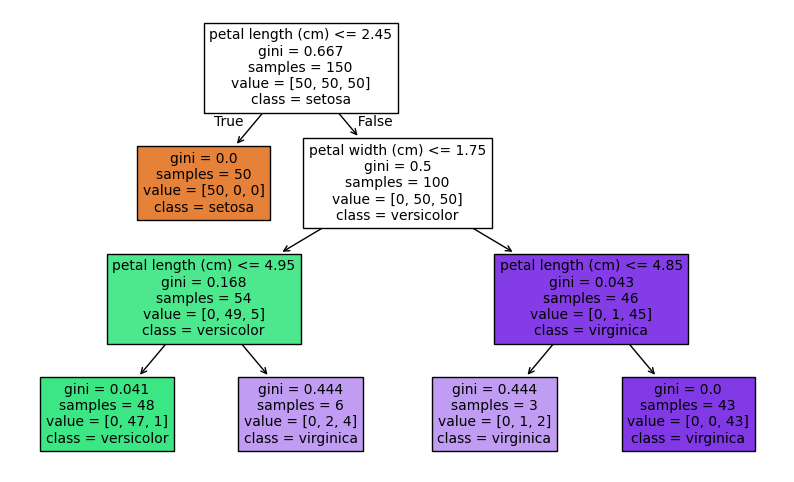

In [5]:
# Visualizamos la estructura del árbol de decisión entrenado
plt.figure(figsize=(10,6))
# plot_tree: función de sklearn para visualizar árboles de decisión
sklearn.tree.plot_tree(tree_clf,
               # Solo usamos las características de pétalo (columnas 2 y 3)
               feature_names=iris.feature_names[2:],
               # Nombres de las clases para las hojas del árbol
               class_names=iris.target_names,
               # filled=True: colorea los nodos según la clase mayoritaria
               filled = True);

## Explicación

Este diagrama muestra un **modelo de clasificación** que intenta predecir la **especie de una flor del conjunto de datos Iris** (uno de los datasets clásicos en data science).  
Las tres clases posibles son:
- Setosa
- Versicolor
- Virginica

El modelo usa las variables de entrada:
- Petal length (largo del pétalo)
- Petal width (ancho del pétalo)

para decidir a qué clase pertenece cada flor.



### Cómo leerlo
Cada **nodo** (caja) representa una **pregunta o condición** sobre una variable.  
Ejemplo:  
`petal length (cm) <= 2.45`  

Si la condición es **verdadera (True)**, se sigue la **rama izquierda**;  
si es **falsa (False)**, se sigue la **rama derecha**.

   
### Significado de los valores dentro de cada nodo
1. **Condición (petal length <= ...)**: el criterio de división.  
2. **gini**: mide la **impureza** del nodo (qué tan mezcladas están las clases).  
   - 0 → todas las muestras son de una sola clase (puro)  
   - 0.5 → mezcla equilibrada de dos clases  
3. **samples**: cuántas muestras hay en ese nodo.  
4. **value = [x, y, z]**: cuántas observaciones de cada clase hay en ese nodo (en este caso [setosa, versicolor, virginica]).  
5. **class = ...**: la clase mayoritaria en ese nodo (la predicción del modelo ahí).

  

### Colores
- Los colores indican la **clase predominante** en ese nodo.  
  - Naranja → setosa  
  - Verde → versicolor  
  - Violeta → virginica  
- Cuanto más **intenso** el color, más puro es el nodo (más baja la impureza Gini).

  

### Funcionamiento del árbol
1. El árbol empieza en la **raíz** (arriba):  
   - Si el pétalo mide ≤ 2.45 cm → la flor es **setosa**.  
   - Si no → pasa a evaluar otras condiciones.
2. A partir de ahí, el árbol sigue dividiendo los datos según el **criterio que mejor separa las clases**.
3. Al llegar a las hojas (nodos sin más ramas), se obtiene la **predicción final**.

  

Resumen:  
“Este árbol de decisión clasifica las flores Iris según las medidas de sus pétalos.  
Cada nodo hace una pregunta, y dependiendo de la respuesta, se sigue una rama.  
El valor de *gini* nos indica cuán mezcladas están las clases en ese punto, y al final cada hoja representa una predicción.  
Es un modelo muy interpretable, ideal para entender cómo toma decisiones un algoritmo.”


Saving figure decision_tree_decision_boundaries_plot


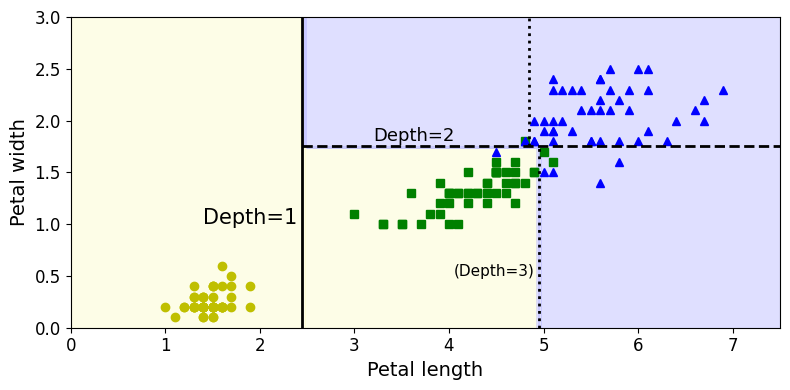

In [6]:
#¿como separa las clases? o como visualizar las fronteras de decisión de un clasificador

# Importamos ListedColormap para crear mapas de colores personalizados
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    """
    Función para visualizar las fronteras de decisión de un clasificador
    """
    # Creamos una malla de puntos para evaluar el clasificador en todo el espacio
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    # Preparamos los datos para hacer predicciones en toda la malla
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # Predecimos la clase para cada punto de la malla
    y_pred = clf.predict(X_new).reshape(x1.shape)
    # Definimos colores personalizados para las regiones de decisión
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    # Dibujamos las regiones coloreadas según las predicciones
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    # Si plot_training=True, dibujamos también los puntos de entrenamiento
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
        plt.axis(axes)
    # Configuramos las etiquetas de los ejes
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Creamos una visualización de las fronteras de decisión del árbol
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
# Dibujamos líneas que muestran cómo el árbol divide el espacio
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)  # Primera división
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)  # Segunda división
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)  # Tercera división
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)  # Cuarta división
# Añadimos texto para indicar la profundidad de cada división
plt.text(1.40, 1.0, "Depth=1", fontsize=15)
plt.text(3.2, 1.80, "Depth=2", fontsize=13)
plt.text(4.05, 0.5, "(Depth=3)", fontsize=11)

# Guardamos la figura
save_fig("decision_tree_decision_boundaries_plot")
plt.show();

## Regiones de decisión de un árbol de decisión

Este gráfico muestra cómo un **árbol de decisión** divide el espacio de características para clasificar las flores del conjunto de datos Iris según sus medidas.  
En este caso, se usan dos variables:
- **Petal length (largo del pétalo)**
- **Petal width (ancho del pétalo)**

Cada punto representa una flor, y el color indica su clase:
- Amarillo: setosa  
- Verde: versicolor  
- Azul: virginica

  

### Ejes y regiones
- El eje **x** muestra el largo del pétalo.  
- El eje **y** muestra el ancho del pétalo.  
- Cada región coloreada corresponde a una **clase predicha** por el árbol.  
- Las **líneas negras** representan las **fronteras de decisión** creadas por el modelo.

  

### Profundidad del árbol (Depth)
- **Depth = 1:** El árbol hace la primera división (vertical). Separa las setosas del resto.  
- **Depth = 2:** Segunda división (horizontal). Separa las versicolor de las virginica.  
- **Depth = 3:** Nivel más profundo (en este ejemplo), ajustando mejor los límites entre clases.

La **profundidad del árbol** indica cuántas divisiones (nodos) se han realizado desde la raíz.  
Un árbol más profundo puede captar más patrones, pero también corre el riesgo de **sobreajustar** (overfitting).

  

### Interpretación general
El gráfico muestra cómo el árbol de decisión **aprende fronteras rectas y jerárquicas** para separar las clases en función de las variables seleccionadas.  
Aunque es un modelo simple, ofrece una **interpretación clara y visual** del proceso de clasificación.


# Predicting classes and class probabilities

In [7]:
# Predicción de probabilidades para un nuevo punto de datos
# El método predict_proba devuelve las probabilidades de pertenencia a cada clase
# Para un punto con pétalo de longitud 4 cm y anchura 1.9 cm
# Resultado: [0% setosa, 33.3% versicolor, 66.7% virginica]
tree_clf.predict_proba([[4, 1.9]])

array([[0.        , 0.33333333, 0.66666667]])

In [8]:
# Predicción de la clase más probable para el mismo punto
# Devuelve la clase con mayor probabilidad (2 = virginica)
tree_clf.predict([[4, 1.9]])

array([2])

# Sensitivity to training set details
El principal problema de los **árboles de decisión** es que son muy sensibles a pequeñas variaciones en los **datos de entrenamiento**.  






In [9]:
# Identificamos la flor Iris versicolor más ancha en el dataset
# Buscamos la muestra con la anchura máxima (1.8) entre las versicolor (y==1)
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [10]:
# Creamos un dataset modificado removiendo la flor versicolor más ancha
# Esto demuestra la sensibilidad de los árboles de decisión a pequeños cambios
# Filtramos: mantenemos las que NO son anchura 1.8 O que son virginica (y==2)
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

# Entrenamos un nuevo árbol con profundidad máxima 2 en el dataset modificado
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Saving figure decision_tree_instability_plot


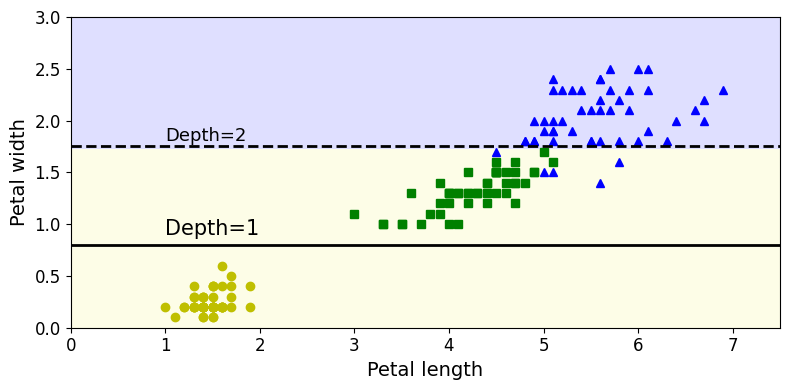

In [11]:
# Visualizamos las fronteras de decisión del árbol modificado
# Comparado con el árbol original, vemos cómo cambió completamente la estructura
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
# Dibujamos las líneas de división del nuevo árbol
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)  # Primera división horizontal
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)  # Segunda división horizontal
# Etiquetamos las profundidades
plt.text(1.0, 0.9, "Depth=1", fontsize=15)
plt.text(1.0, 1.80, "Depth=2", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Saving figure min_samples_leaf_plot


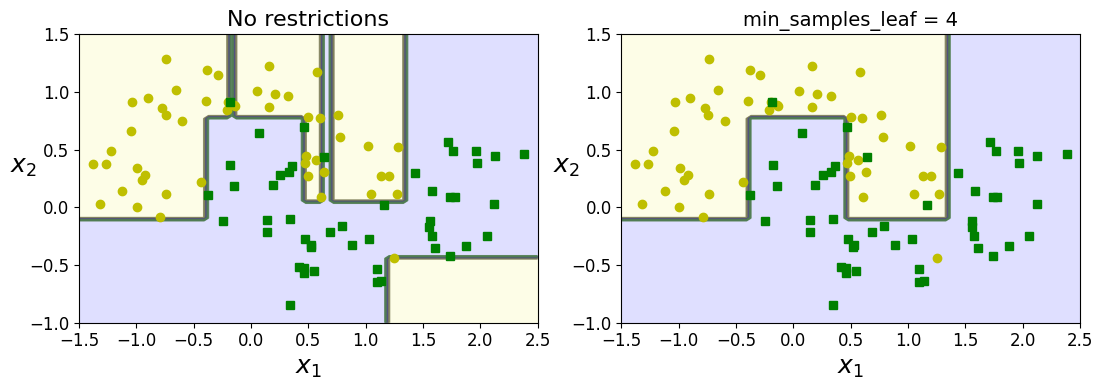

In [12]:
# Creamos un dataset artificial con forma de medias lunas para demostrar overfitting
# make_moons genera datos en forma de dos medias lunas entrelazadas
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# Entrenamos dos árboles con diferentes restricciones
# Árbol 1: Sin restricciones (propenso a overfitting)
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
# Árbol 2: Con restricción mínima de 4 muestras por hoja (más generalizable)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

# Visualizamos las diferencias en las fronteras de decisión
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

## Comparación de árboles de decisión con y sin restricciones

La siguiente figura muestra cómo cambia la **frontera de decisión** de un modelo de **árbol de decisión** al aplicar restricciones en su entrenamiento.

  

### Descripción general

Se comparan dos modelos:

- **Izquierda:** Árbol sin restricciones (`No restrictions`)
- **Derecha:** Árbol con una restricción en el número mínimo de muestras por hoja (`min_samples_leaf = 4`)

  

### Interpretación de los gráficos

### Árbol sin restricciones
- El modelo se ajusta **perfectamente a los datos de entrenamiento**.
- La frontera de decisión es **muy irregular y fragmentada**.
- Indica **sobreajuste (overfitting)**: el modelo memoriza los datos en lugar de aprender patrones generales.

### Árbol con `min_samples_leaf = 4`
- Cada hoja del árbol debe contener al menos **4 muestras**.
- La frontera de decisión se vuelve **más suave y simple**.
- El modelo **generaliza mejor**, reduciendo el sobreajuste.

  

### Detalles del gráfico

- Los ejes \( x_1 \) y \( x_2 \) representan las características de entrada.
- Los **puntos amarillos y verdes** son los datos reales de dos clases distintas.
- Las **zonas coloreadas** muestran las regiones donde el modelo predice cada clase.
- Las **líneas oscuras** son las fronteras de decisión aprendidas por el árbol.

  

### Conclusión

A la izquierda, el árbol de decisión fue entrenado con los **hiperparámetros por defecto** (es decir, sin restricciones),  
y a la derecha fue entrenado con **min_samples_leaf = 4**.  

Es bastante evidente que el modelo de la izquierda está **sobreajustando (overfitting)**,  
mientras que el modelo de la derecha probablemente **generalice mejor**.

Aplicar una restricción como `min_samples_leaf` en los árboles de decisión ayuda a:
- Evitar el sobreajuste.
- Crear modelos más simples y estables.
- Mejorar la capacidad de generalización en datos nuevos.


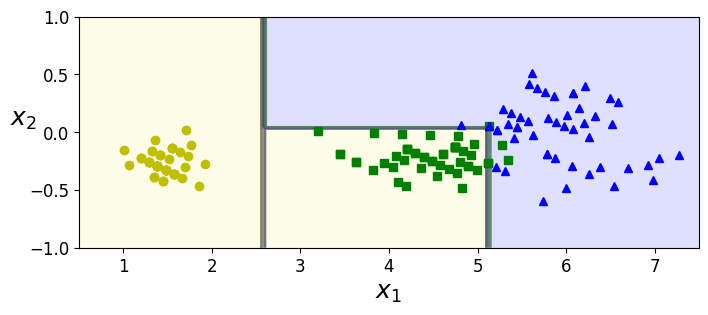

In [13]:
# Demostramos la sensibilidad de los árboles de decisión a la rotación
# Rotamos los datos del iris 20 grados usando una matriz de rotación
angle = np.pi / 180 * 20  # 20 grados convertidos a radianes
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)  # Aplicamos la rotación a los datos

# Entrenamos un nuevo árbol con los datos rotados
tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

# Visualizamos las fronteras de decisión con datos rotados
# Notaremos que el árbol tiene dificultades con datos rotados
plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Saving figure sensitivity_to_rotation_plot


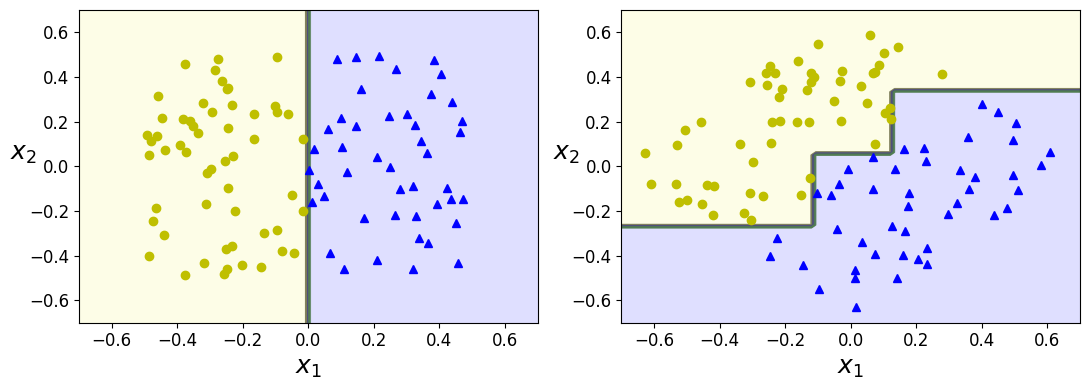

In [14]:
# Creamos un ejemplo más claro de sensibilidad a rotación
# Generamos datos aleatorios simples: clase basada en si x > 0
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5  # Datos aleatorios centrados en 0
ys = (Xs[:, 0] > 0).astype(np.float32) * 2  # Clase: 0 si x<0, 2 si x>0

# Rotamos los datos 45 grados
angle = np.pi / 4  # 45 grados
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

# Entrenamos árboles en datos originales y rotados
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

# Comparamos las fronteras de decisión
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()



### Qué muestra la figura
- **Izquierda (sin rotar):**  
  El árbol separa perfecto con un **corte vertical** en `x1 = 0`.  
  Como los árboles usan **divisiones alineadas a ejes** (umbral en una sola característica), la frontera es una línea vertical simple.

- **Derecha (rotado 45°):**  
  La frontera verdadera ahora es **diagonal**.  
  El árbol solo puede aproximarla con **escalones axis-aligned** (rectángulos), por lo que la separación es más tosca y puede requerir más profundidad/hojas para acercarse a la diagonal.





# Regression trees

In [15]:
# Creamos un dataset cuadrático con ruido para demostrar árboles de regresión
# Los árboles de regresión predicen valores numéricos en lugar de clases
np.random.seed(42)
m = 200  # 200 muestras
X = np.random.rand(m, 1)  # Variable x entre 0 y 1
y = 4 * (X - 0.5) ** 2  # Función cuadrática
y = y + np.random.randn(m, 1) / 10  # Añadimos ruido gaussiano

In [16]:
# Entrenamos un árbol de regresión con profundidad máxima de 2
# Los árboles de regresión minimizan el error cuadrático medio en cada hoja
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### Concepto de `max_depth` en árboles de decisión

El parámetro **`max_depth`** controla la **profundidad máxima** que puede tener un árbol de decisión, es decir, el número máximo de niveles de divisiones desde la raíz hasta una hoja.

### Función
- Limita la **complejidad** del modelo.  
- Cada nivel adicional permite al árbol capturar más patrones, pero también aumenta el riesgo de **sobreajuste**.

### Efectos
- **Poca profundidad (`max_depth` pequeño):**  
  Modelo simple que puede no capturar bien los datos → **subajuste**.  
- **Mucha profundidad (`max_depth` grande):**  
  Modelo muy flexible que puede ajustarse al ruido → **sobreajuste**.

### Conclusión
Elegir un valor adecuado de `max_depth` es clave para equilibrar **precisión y generalización** en los árboles de decisión.


Saving figure tree_regression_plot


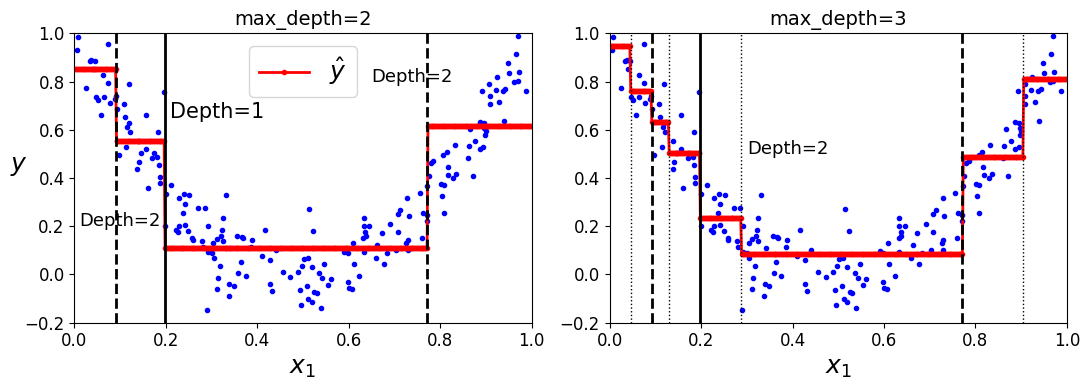

In [17]:
# Comparamos árboles de regresión con diferentes profundidades
from sklearn.tree import DecisionTreeRegressor

# Árbol con profundidad máxima 2 (más simple, menos overfitting)
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
# Árbol con profundidad máxima 3 (más complejo, mayor capacidad)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    """
    Función para visualizar las predicciones de un árbol de regresión
    """
    # Creamos puntos de evaluación espaciados uniformemente
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    # Predecimos para cada punto
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    # Graficamos datos originales y predicciones del árbol
    plt.plot(X, y, "b.")  # Datos originales en azul
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")  # Predicciones en rojo

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
# Dibujamos las líneas de división del árbol de profundidad 2
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=1", fontsize=15)
plt.text(0.01, 0.2, "Depth=2", fontsize=13)
plt.text(0.65, 0.8, "Depth=2", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
# Dibujamos las líneas de división del árbol de profundidad 3
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
# Divisiones adicionales de profundidad 3
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()



La figura muestra cómo cambia la predicción de un **árbol de regresión** según la profundidad máxima (`max_depth`).

### Descripción

- Los **puntos azules** son los datos reales.
- La **línea roja** representa la predicción del árbol (\(\hat{y}\)).
- Las **líneas verticales** indican los puntos de división del árbol.

### Interpretación

- **Izquierda (`max_depth=2`)**:  
  Pocas divisiones → modelo simple → **subajuste**.

- **Derecha (`max_depth=3`)**:  
  Más divisiones → mejor ajuste a los datos → **mayor flexibilidad**, pero con riesgo de sobreajuste si se sigue aumentando la profundidad.

### Conclusión
Aumentar `max_depth` mejora el ajuste, pero un árbol demasiado profundo puede perder capacidad de generalización.


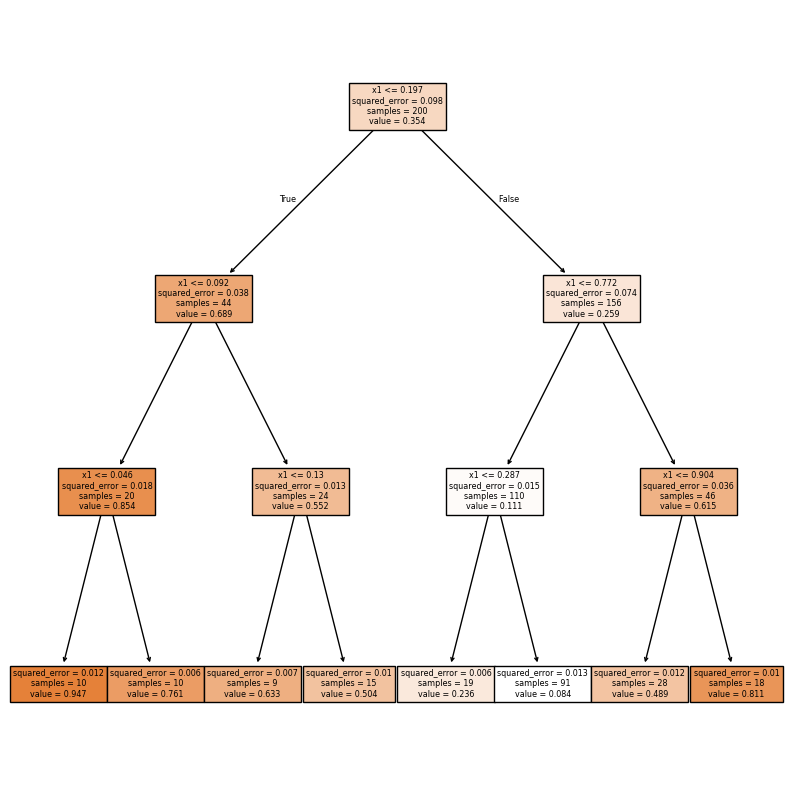

In [18]:
# Visualizamos la estructura del árbol de regresión de profundidad 3
# Esto nos muestra cómo el árbol toma decisiones numéricas en cada nodo
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_reg2,
               feature_names=["x1"],  # Solo tenemos una característica
               filled = True);  # Coloreamos los nodos según su valor predicho

Saving figure tree_regression_regularization_plot


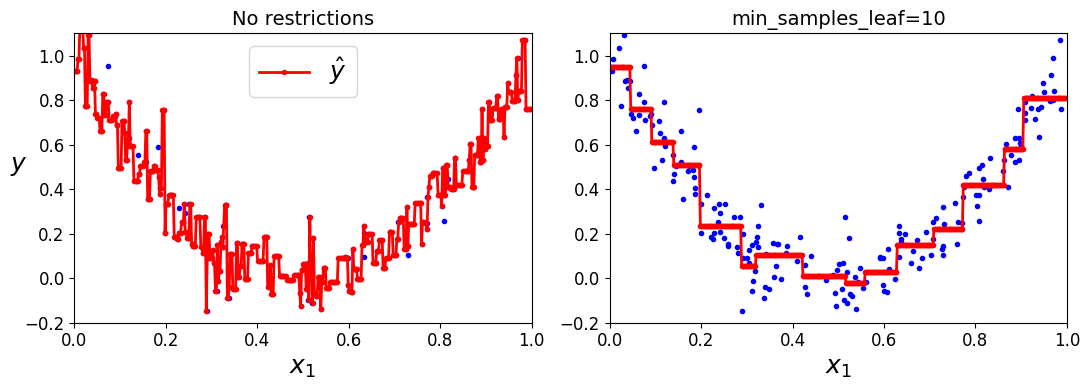

In [19]:
# Comparamos regularización en árboles de regresión
# Árbol 1: Sin restricciones (overfitting)
tree_reg1 = DecisionTreeRegressor(random_state=42)
# Árbol 2: Con restricción mínima de 10 muestras por hoja (regularizado)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# Generamos predicciones para visualización
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")  # Datos de entrenamiento
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")  # Predicciones
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")  # Datos de entrenamiento
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")  # Predicciones
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()